# Module 6 Section 2 Lab 1 - K-Means Clustering

Algoritma K-Means mengelompokkan data menjadi sejumlah $K$ kelompok sesuai dengan yang kita tentukan. K-Means adalah algoritma iteratif yang menjangkau sejumlah klaster yang telah ditentukan sebelumnya dalam kumpulan data yang tidak berlabel. K-Means memiliki langkah-langkah dasar sebagai berikut:
1. Tentukan jumlah $K$ klaster (kelompok) yang kita inginkan.
2. Inisiasi *centroid* untuk setiap klaster secara acak. *Centroid* adalah data yang merepresentasikan suatu klaster atau kita bisa anggap sebagai ketua kelompok. 
3. Hitung kedekatan suatu data terhadap *centroid*. Kemudian masukkan data tersebut ke klaster yang *centroid*-nya memiliki sifat terdekat dengan dirinya.
4. Pilih kembali *centroid* untuk masing-masing klaster dari anggota klaster tersebut. Anggap saja seperti memilih ketua kelompok baru.
5. Ulangi langkah ke-3 dan 4 sampai tidak ada perubahan anggota untuk semua klaster.

Apabila perbedaan suatu data terhadap kedua *centroid* bernilai sama, maka kita masukkan data tersebut ke kelas dengan nomor urut lebih kecil.

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif?20170530143526' width=600></img></center>

Baca selanjutnya: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Kelemahan
- Jumlah klaster tidak diketahui. Kita bisa menggunakan sejumlah $K$ yang berbeda dalam interval tertentu yang dianggap paling masuk akal. Lakukan analisis kualitas hasil klaster untuk memilih $K$ yang paling baik.
- Ukuran klaster tidak seimbang (*unbalanced*).
- Himpunan data memiliki pencilan (*noise*).

## Elbow Method
Metode ini menjalankan K-means clustering pada dataset untuk rentang nilai $K$ (katakanlah dari 1-10) dan kemudian untuk setiap nilai $K$ menghitung skor rata-rata untuk semua kelompok. Secara default, skor distorsi dihitung, jumlah jarak kuadrat dari setiap titik ke pusat yang ditetapkan.

Ketika metrik keseluruhan untuk setiap model ini diplot, dimungkinkan untuk menentukan nilai terbaik untuk $K$ secara visual. Jika diagram garis terlihat seperti lengan, maka 'siku' (titik belok pada kurva) adalah nilai $K$ terbaik. "Lengan" bisa naik atau turun, tetapi jika ada titik belok yang kuat, ini merupakan indikasi yang baik bahwa model yang mendasarinya paling cocok pada titik itu.

<center><img src='https://raw.githubusercontent.com/ksnugroho/ai-mastery/main/assets/elbow-method.png' width=1000></img></center>

Baca selanjutnya: https://eudl.eu/doi/10.4108/eai.24-1-2018.2292388







# Case Study: Segmentasi Pengunjung Mall

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('dataset/mall_customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Hapus kolom tertentu menggunakan fungsi drop()
data = data.drop('CustomerID', axis=1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
# Cek apakah ada data yang memiliki null-values menggunakan fungsi isnull()
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Cek apakah ada data yang terduplikasi menggunakan fungsi duplicated()
data.duplicated().sum()

0

In [12]:
data = data.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Exploratory Data Analysis

## Gender

In [16]:
# Menemukan nilai unik di kolom menggunakan fungsi unique()
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
# Hitung value di setiap nilai unik pada kolom menggunakan fungsi value_counts()
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

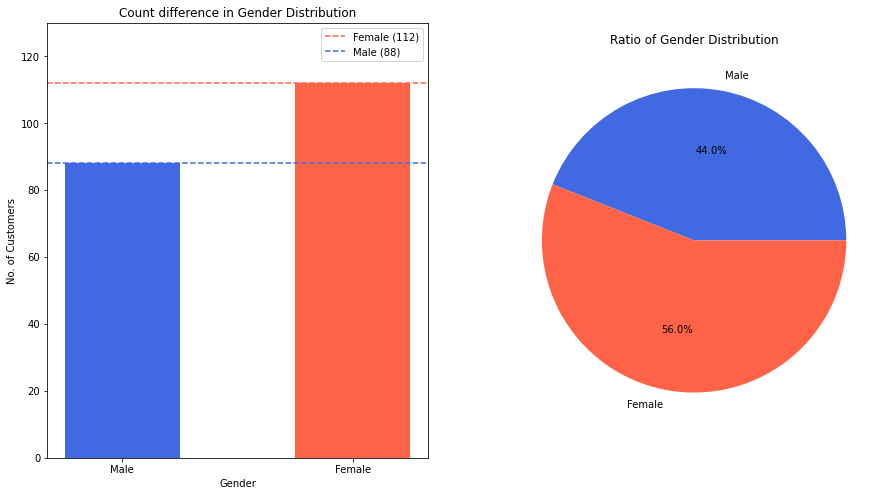

In [25]:
labels = data['Gender'].unique()
values = data['Gender'].value_counts(ascending=True)

fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(15,8))

# Bar chart
bar = ax0.bar(x=labels, height=values, width=0.5, align='center', color=['royalblue','tomato'])
ax0.set(title='Count difference in Gender Distribution', xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='tomato', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='royalblue', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()

# Pie chart
ax1.pie(values, labels=labels, colors=['royalblue','tomato'], autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')

plt.show()

## Age

In [26]:
# Menemukan nilai unik di kolom menggunakan fungsi unique()
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [27]:
# Statistik deskriptif pada kolom menggunakan fungsi describe()
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

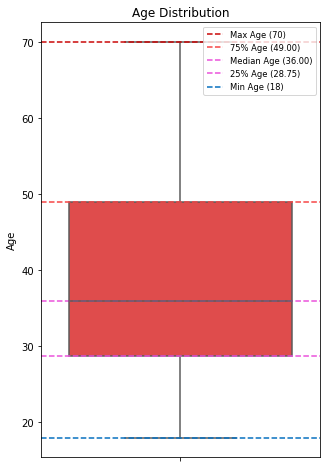

In [33]:
fig, ax = plt.subplots(figsize=(5,8))
ax = sns.boxplot(y=data["Age"], color="#f73434")

ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='small', loc='upper right')

plt.title('Age Distribution')
plt.show()

In [34]:
data['Age'].value_counts().head()

32    11
35     9
31     8
19     8
30     7
Name: Age, dtype: int64

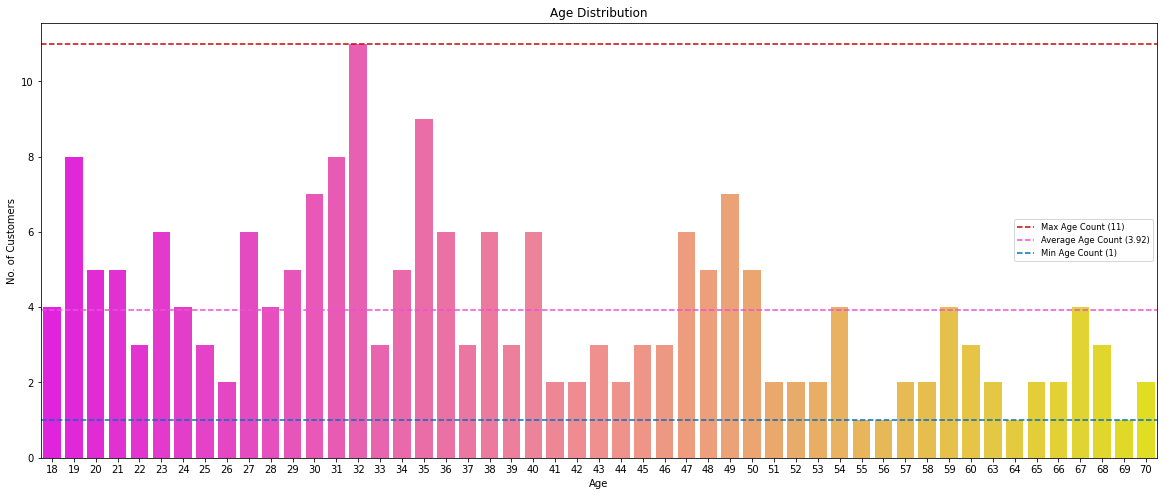

In [36]:
fig, ax = plt.subplots(figsize=(20,8))

ax = sns.countplot(x=data['Age'], palette='spring')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--', color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--', color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.2f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--', color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(fontsize='small', loc='best')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution')
plt.show()

In [37]:
data[data['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [38]:
data[data['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

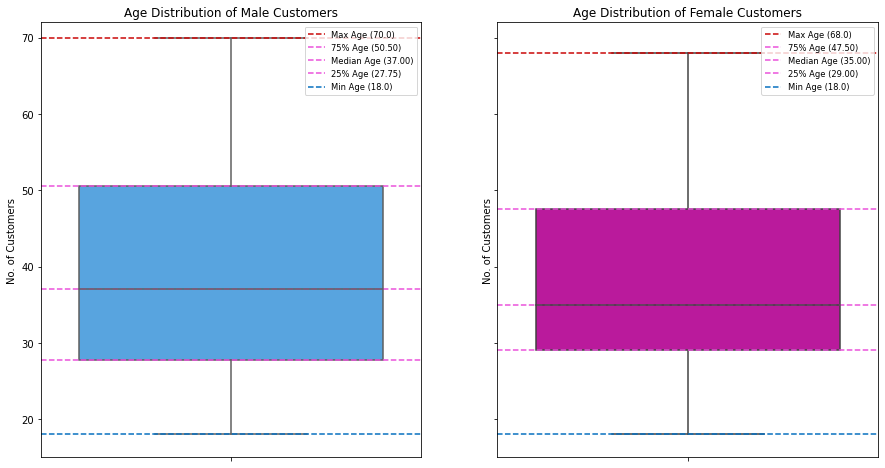

In [42]:
data_male = data[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8), sharey=True)

sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

## Annual Income

In [43]:
data['Annual_Income'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [44]:
data['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

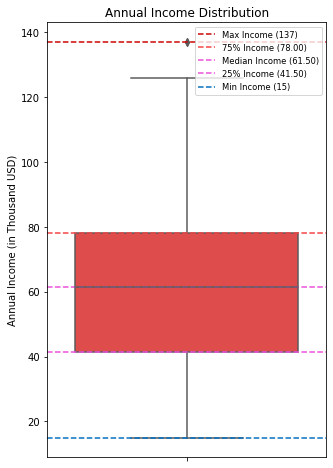

In [46]:
fig, ax = plt.subplots(figsize=(5,8))

ax = sns.boxplot(y=data["Annual_Income"], color="#f73434")
ax.axhline(y=data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data.Annual_Income.max()})')
ax.axhline(y=data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data.Annual_Income.median():.2f})')
ax.axhline(y=data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data.Annual_Income.min()})')
ax.legend(fontsize='small', loc='upper right')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution')
plt.show()

In [47]:
data['Annual_Income'].value_counts().head()

54    12
78    12
48     6
71     6
63     6
Name: Annual_Income, dtype: int64

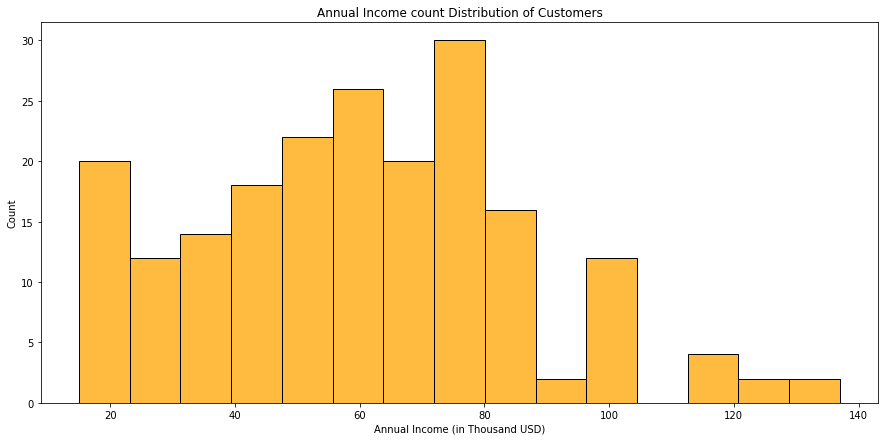

In [48]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.histplot(data['Annual_Income'], bins=15, ax=ax, color=['orange'])
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers')
plt.show()

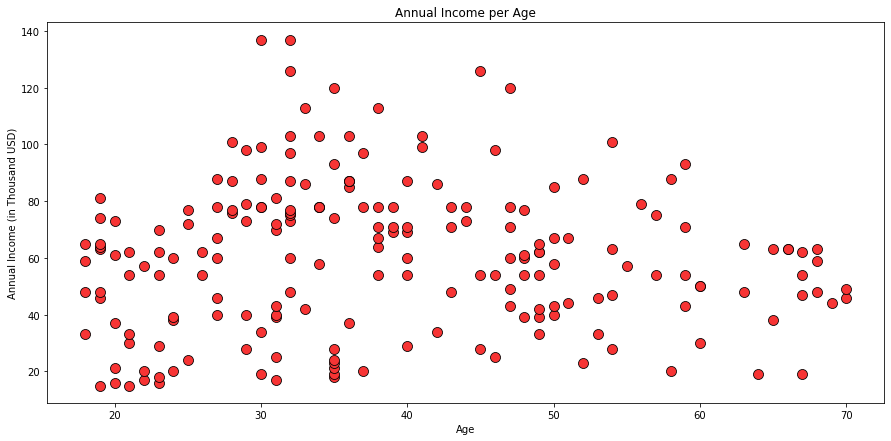

In [49]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], color='#f73434', s=100, edgecolor='black')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age')
plt.show()

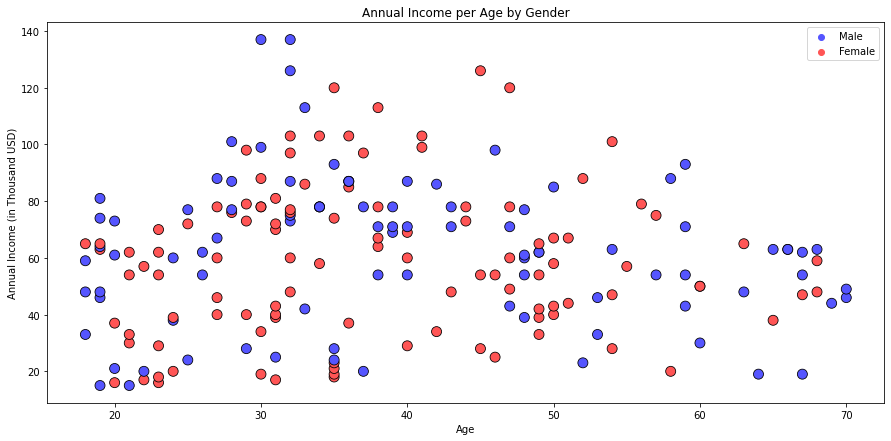

In [50]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=100, edgecolor='black')
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender')
plt.show()

## Spending Score

In [51]:
data['Spending_Score'].head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score, dtype: int64

In [52]:
data['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

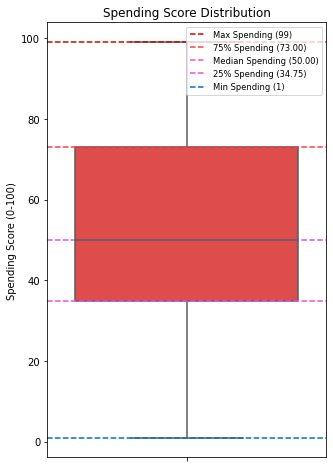

In [53]:
fig, ax = plt.subplots(figsize=(5,8))

ax = sns.boxplot(y=data['Spending_Score'], color="#f73434")
ax.axhline(y=data['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({data.Spending_Score.max()})')
ax.axhline(y=data['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({data.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=data['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({data.Spending_Score.median():.2f})')
ax.axhline(y=data['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({data.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=data['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({data.Spending_Score.min()})')
ax.legend(fontsize='small', loc='upper right')
ax.set_ylabel('Spending Score (0-100)')

plt.title('Spending Score Distribution')
plt.show()

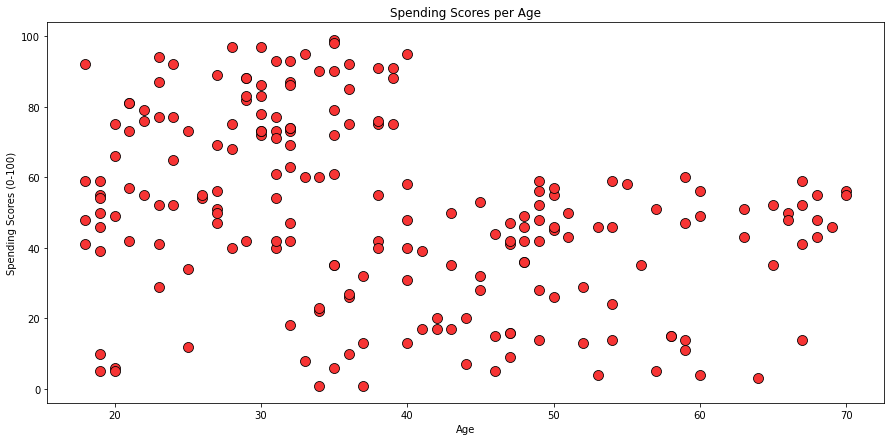

In [54]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], s=100, color='#f73434', edgecolor='black')
ax.set_ylabel('Spending Scores (0-100)')

plt.title('Spending Scores per Age')
plt.show()

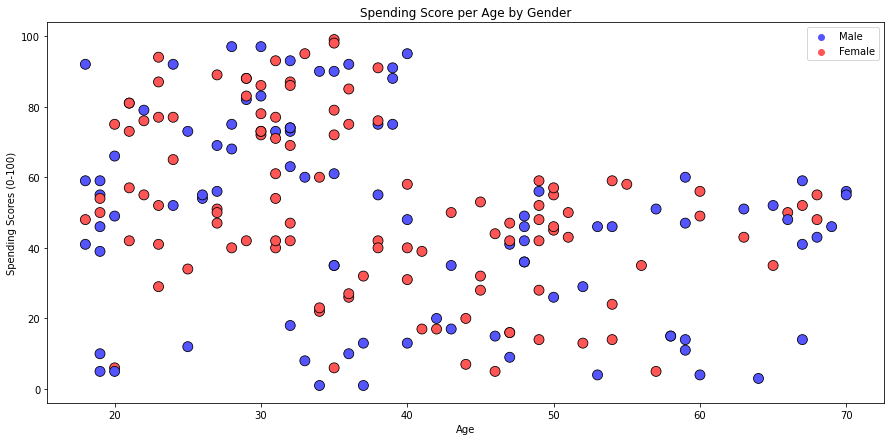

In [60]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], hue=data['Gender'], palette='seismic', s=100, edgecolor='black')
ax.set_ylabel('Spending Scores (0-100)')
ax.legend(loc='upper right')

plt.title('Spending Score per Age by Gender')
plt.show()

# Klasterisasi

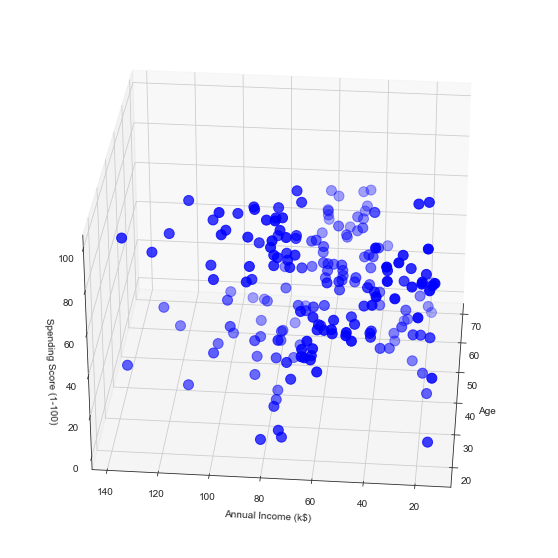

In [70]:
# Kita akan lihat data sebelum dilakukan cluster

from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(50,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data["Annual_Income"], data["Spending_Score"], c='blue', s=100)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [71]:
'''
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
'''
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)

print(wcss)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[308812.7800000001, 212840.16982097193, 143342.75157170597, 104366.151455562, 75350.77917248776, 58300.443321590676, 51084.50595493435, 44312.468812077226, 41588.19795221119, 37221.3800490761]


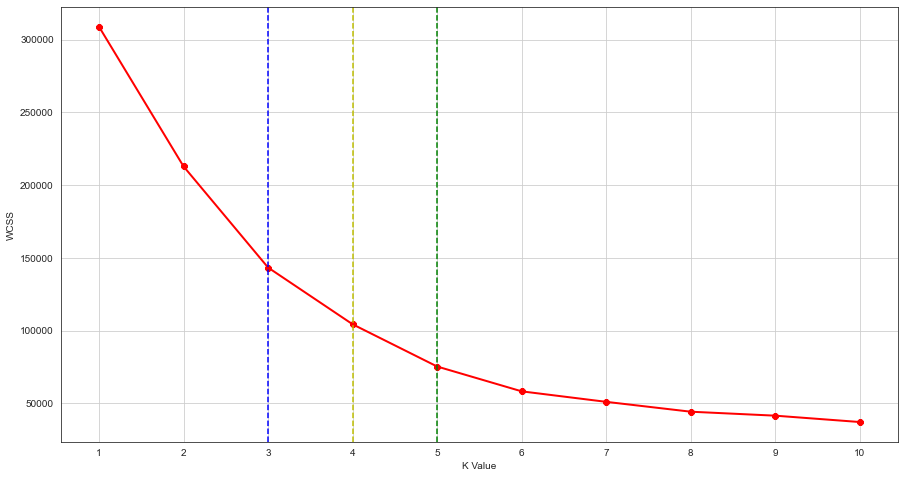

In [82]:
plt.figure(figsize=(15,8))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker='8')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.axvline(x=3, color='b', ls='--')
plt.axvline(x=4, color='y', ls='--')
plt.axvline(x=5, color='g', ls='--')
plt.ylabel("WCSS")
plt.show()

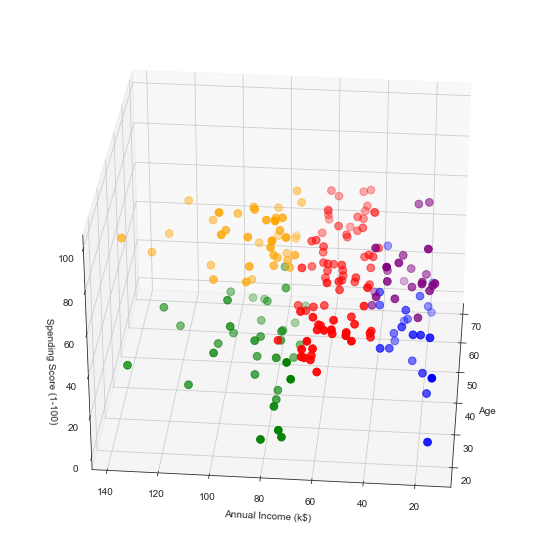

In [80]:
kmeans = KMeans(n_clusters=5)

clusters = kmeans.fit_predict(data.iloc[:,1:])

data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data['Annual_Income'][data.label == 0], data['Spending_Score'][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data['Annual_Income'][data.label == 1], data['Spending_Score'][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data['Annual_Income'][data.label == 2], data['Spending_Score'][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data['Annual_Income'][data.label == 3], data['Spending_Score'][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data['Annual_Income'][data.label == 4], data['Spending_Score'][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()